In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
sns.set()  #  Will import Seaborn functionalities


# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Disply all Columns
pd.options.display.max_columns=13

In [3]:
#loading the data
beer = pd.read_csv('BeerDataScienceProject.csv')

beer.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,"A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.",1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer.",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compact, not bad. Light smell, just a bit of roast, and some hop. A bit too light. The taste is light oo, and drinkable, with some malt, roast, hints of coffee. Nothing exceptional, but after all drinkable and pleasant. Light to average body. In the aftertaste some dust, somr roast, hint of caramel, and a bit of bitterness. No defect, drinkable, not bad.",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good hop. Quite dry, with a good grassy note. Hay. Fresh and pleasant. More sweet in the mouth, with honey. The hop comes back in the end, and in the aftertaste. Not bad, but a bit too sweet for a pils. In the end some vanilla and camomile note. In the aftertaste, too. Though the hop, a bit too sweet. Honest.",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bitter, it's really hard for me to imagine ordering more than a single glass. Regardless, this is a very impressive beer from the folks at Caldera.",1293735206


In [4]:
# taking the text column off to properly vizualise the dataset

df_beer = beer.drop('review_text', axis = 1)
df_beer.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,1293735206


###### EDA

In [5]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [6]:
beer.shape

(528870, 13)

In [7]:
beer.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [8]:
beer.describe(include=['object', 'bool'])

NumExpr defaulting to 8 threads.


,beer_name,beer_style,review_profileName,review_text
count,528870,528870,528755,528751
unique,18339,104,22800,528371
top,Sierra Nevada Celebration Ale,American IPA,northyorksammy,#NAME?
freq,3000,43369,1858,92


##### Missing Values

In [9]:
beer.isnull().sum() # Counting null values

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [10]:
# Percent Null Valuesx=beer.isnull().sum()
x=beer.isnull().sum()
y=(beer.isnull().sum()/beer.shape[0])*100
z={'Number of missing values':x,'Percentage of missing values':y}
df_a=pd.DataFrame(z,columns=['Number of missing values','Percentage of missing values'])
df_a.sort_values(by='Percentage of missing values',ascending=False)

,Number of missing values,Percentage of missing values
beer_ABV,20280,3.834591
review_text,119,0.022501
review_profileName,115,0.021744
beer_beerId,0,0.000000
beer_brewerId,0,0.000000
beer_name,0,0.000000
beer_style,0,0.000000
review_appearance,0,0.000000
review_palette,0,0.000000
review_overall,0,0.000000


##### Taking care of missing values by mode imputation

In [11]:
for column in ['review_text']:
   beer[column].fillna(beer[column].mode()[0], inplace=True)

In [12]:
for column in ['review_profileName']:
   beer[column].fillna(beer[column].mode()[0], inplace=True)

In [13]:
for column in ['beer_ABV']:
   beer[column].fillna(beer[column].mode()[0], inplace=True)

In [14]:
# checking for null values again
beer.isnull().sum()

beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

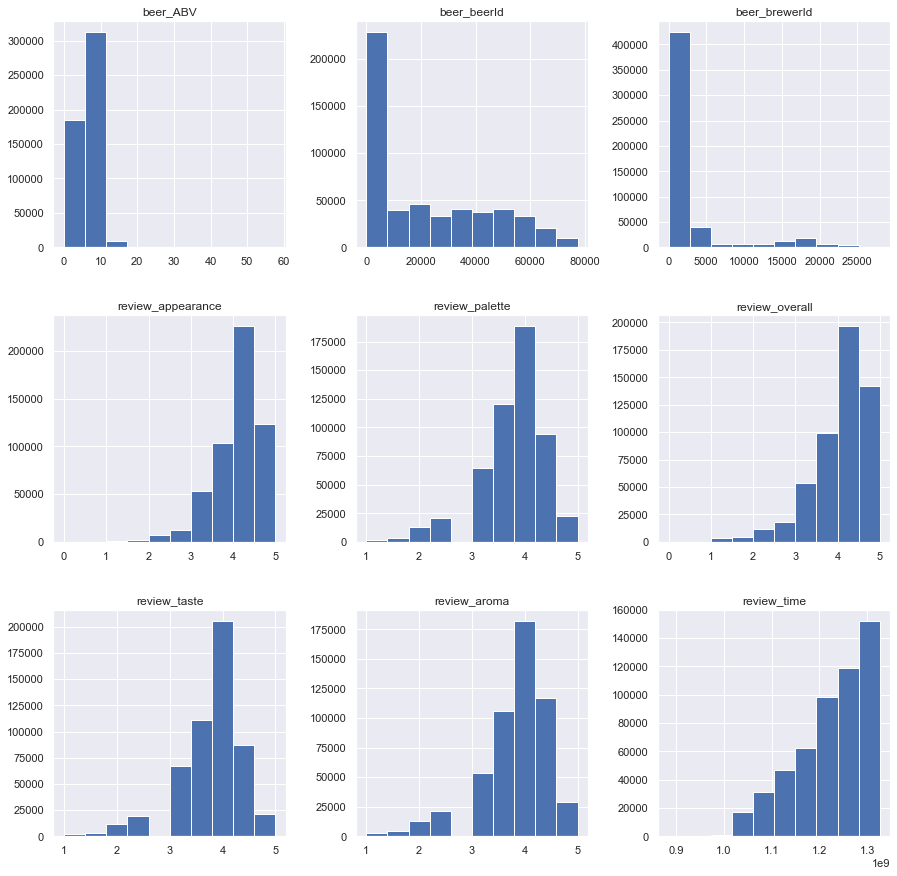

In [15]:
sns.set()

df_beer.hist(figsize=(15,15));

### 1. Rank top 3 Breweries which produce the strongest beers?

In [16]:
beer['beer_ABV'].max()

57.7

In [17]:
beer['beer_brewerId'].unique()

array([10325,  1075,  8802, ..., 11492, 13004,  3340], dtype=int64)

In [18]:
beer['beer_brewerId'].nunique()

1803

In [19]:
new = [beer['beer_ABV'], beer['beer_brewerId']]

# Create the pandas DataFrame having only beer_ABV and beer_brewerId
new = pd.DataFrame(new).T
new.head()

,beer_ABV,beer_brewerId
0,5.0,10325.0
1,6.2,10325.0
2,6.5,10325.0
3,5.0,10325.0
4,7.7,1075.0


In [20]:
# sort it out to see the highest beer_ABV
new_sorted = new.sort_values(['beer_ABV', 'beer_brewerId'], ascending = False)
new_sorted.head(10)

,beer_ABV,beer_brewerId
12889,57.70,6513.0
12909,43.00,6513.0
12910,43.00,6513.0
12911,39.44,6513.0
12912,39.44,6513.0
12913,39.44,6513.0
12888,30.86,6513.0
293656,27.00,35.0
293657,27.00,35.0
293658,27.00,35.0


In [21]:
# sort to find out the highest ranking beer that produces the strongest beer
strong = beer.groupby('beer_brewerId')['beer_ABV'].count().nlargest()
strong.head()

beer_brewerId
35      39444
140     28751
132     24083
1199    20004
3818    15868
Name: beer_ABV, dtype: int64

Text(0, 0.5, 'Strenght of beer')

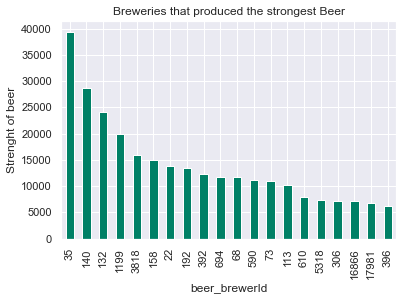

In [22]:
#BAR GRAPH OF BREWERIES WITH THE STRONGEST BEER
plot1 = beer.groupby('beer_brewerId')['beer_ABV'].count().nlargest(20).plot(kind='bar', \
               title='Breweries that produced the strongest Beer', \
               colormap='summer',  )

plot1.set_ylabel('Strenght of beer')

### Breweries with ID number 35, 140 and 132 were the top 3 producers of strong beer.

### 2. Which year did the beers enjoy the highest ratings? 

In [23]:
# convert the format of review_time to datetime format and keep only the year
beer['review_time']= pd.to_datetime(beer['review_time'], unit='s')

In [24]:
beer['review_time'] = pd. DatetimeIndex(beer['review_time']). year

In [25]:
# checking to see the converted time
beer.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,"A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.",2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer.",2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compact, not bad. Light smell, just a bit of roast, and some hop. A bit too light. The taste is light oo, and drinkable, with some malt, roast, hints of coffee. Nothing exceptional, but after all drinkable and pleasant. Light to average body. In the aftertaste some dust, somr roast, hint of caramel, and a bit of bitterness. No defect, drinkable, not bad.",2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good hop. Quite dry, with a good grassy note. Hay. Fresh and pleasant. More sweet in the mouth, with honey. The hop comes back in the end, and in the aftertaste. Not bad, but a bit too sweet for a pils. In the end some vanilla and camomile note. In the aftertaste, too. Though the hop, a bit too sweet. Honest.",2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bitter, it's really hard for me to imagine ordering more than a single glass. Regardless, this is a very impressive beer from the folks at Caldera.",2010


In [26]:
df = [beer['review_time'], beer['review_overall']]

# Create the pandas DataFrame for review_time and review_overall
df= pd.DataFrame(df).T
df.head()

,review_time,review_overall
0,2009.0,1.5
1,2009.0,3.0
2,2009.0,3.0
3,2009.0,3.0
4,2010.0,4.0


In [27]:
# sort out the values by review time
df_sorted = df.sort_values(['review_time', 'review_overall'], ascending = False)
df_sorted.head(10)

,review_time,review_overall
433,2012.0,5.0
3351,2012.0,5.0
4983,2012.0,5.0
15295,2012.0,5.0
15302,2012.0,5.0
16277,2012.0,5.0
16278,2012.0,5.0
16281,2012.0,5.0
16285,2012.0,5.0
16386,2012.0,5.0


In [28]:
# sort to find out the year that had the highest reviews
df_group = beer.groupby('review_time')['review_overall'].count().sort_values(ascending=False)
df_group.head()

review_time
2011    110836
2010     93810
2009     83578
2008     69080
2007     46514
Name: review_overall, dtype: int64

Text(0, 0.5, 'overall review')

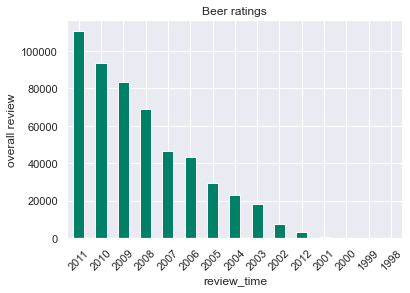

In [29]:
#BAR GRAPH OF THE YEAR WITH THE HIGHEST BEER RATINGS
plot = beer.groupby('review_time')['review_overall'].count().nlargest(20).plot(kind='bar', \
               title='Beer ratings', \
               colormap='summer',  )
plt.xticks(rotation = 45)
plot.set_ylabel('overall review')

### The year 2011, 2010 and 2009 had the highest beer ratings

### 3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

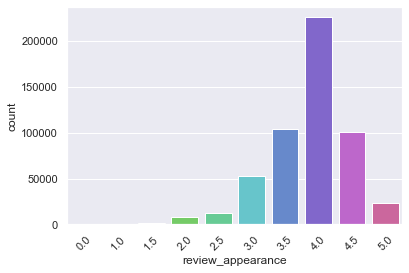

In [30]:
sns.countplot(x='review_appearance',data=beer, palette='hls')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()


In [31]:
beer['review_appearance'].value_counts()

4.0    226081
3.5    103728
4.5    100536
3.0     53194
5.0     23107
2.5     12258
2.0      7513
1.5      1616
1.0       834
0.0         3
Name: review_appearance, dtype: int64

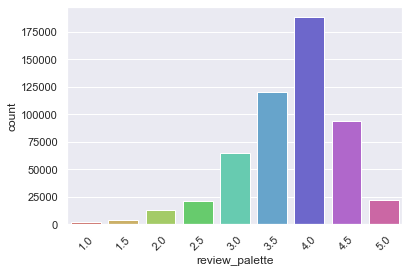

In [32]:
sns.countplot(x='review_palette',data=beer, palette='hls')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()


In [33]:
beer['review_palette'].value_counts()

4.0    188463
3.5    120100
4.5     93923
3.0     64623
5.0     22320
2.5     20936
2.0     13024
1.5      3579
1.0      1902
Name: review_palette, dtype: int64

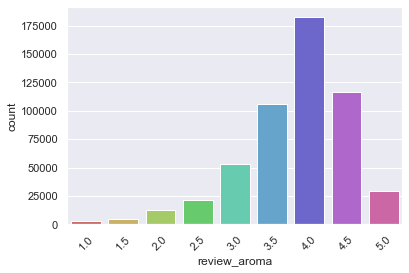

In [34]:
sns.countplot(x='review_aroma',data=beer, palette='hls')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [35]:
beer['review_aroma'].value_counts()

4.0    182294
4.5    116460
3.5    106232
3.0     53495
5.0     29031
2.5     21060
2.0     13013
1.5      4446
1.0      2839
Name: review_aroma, dtype: int64

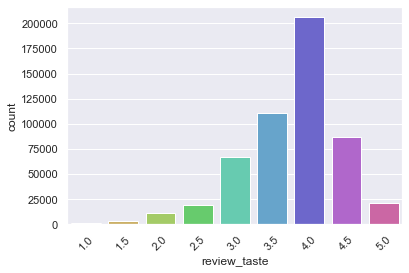

In [36]:
sns.countplot(x='review_taste',data=beer, palette='hls')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [37]:
beer['review_taste'].value_counts()

4.0    205951
3.5    110996
4.5     86918
3.0     66954
5.0     21648
2.5     19647
2.0     11732
1.5      3184
1.0      1840
Name: review_taste, dtype: int64

#### Finding the important features using ensemble boosting method

In [38]:
df1_beer = beer.loc[:,['review_taste','review_aroma','review_appearance', 'review_palette', 'review_overall']]
df1_beer.head()

,review_taste,review_aroma,review_appearance,review_palette,review_overall
0,1.5,1.5,2.5,2.0,1.5
1,3.0,3.0,3.0,2.5,3.0
2,3.0,3.0,3.0,2.5,3.0
3,2.5,3.0,3.5,3.0,3.0
4,4.0,4.5,4.0,4.5,4.0


In [39]:
 Xin = df1_beer.drop('review_overall', axis = 1)
 yin = df1_beer.review_overall

In [40]:
# xgboost for feature importance 
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot

# define the model
model = XGBClassifier()
# fit the model
model.fit(Xin, yin)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

[10:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.09741
Feature: 1, Score: 0.87674
Feature: 2, Score: 0.01239
Feature: 3, Score: 0.01347


In [41]:
feature_importances = pd.DataFrame({'Importance Coef' :model.feature_importances_ , 'Features' : Xin.columns})
feature_importances.nlargest(135, 'Importance Coef')

,Importance Coef,Features
1,0.876736,review_aroma
0,0.097411,review_taste
3,0.013465,review_palette
2,0.012388,review_appearance


In [42]:
feat_labels = ['review_taste','review_aroma','review_appearance', 'review_palette']
for feature in zip(feat_labels,model.feature_importances_):
    print(feature)

('review_taste', 0.097410895)
('review_aroma', 0.8767358)
('review_appearance', 0.012388155)
('review_palette', 0.013465057)


In [43]:
from sklearn.feature_selection import SelectFromModel 
sfm = SelectFromModel(model, threshold=0.1)
sfm.fit(Xin, yin)

for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

[10:39:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
review_aroma


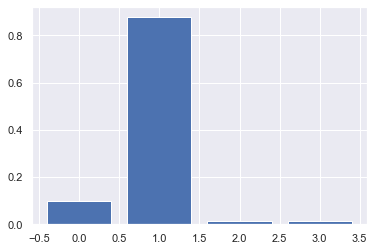

In [44]:
# # plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### Finding important features usiing correlation

In [45]:
# Finding the corelation of all reviews with the overall reviews
corr = df_beer.corr()
corr

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
beer_ABV,1.000000,0.218097,0.078540,0.252577,0.319468,0.119603,0.269182,0.271716,0.143451
beer_beerId,0.218097,1.000000,0.462537,0.050345,0.061283,-0.010388,0.036456,0.015569,0.462993
beer_brewerId,0.078540,0.462537,1.000000,-0.008476,0.013062,-0.016511,-0.005957,-0.013141,0.244962
review_appearance,0.252577,0.050345,-0.008476,1.000000,0.547691,0.486687,0.554775,0.534244,0.053290
review_palette,0.319468,0.061283,0.013062,0.547691,1.000000,0.601971,0.604271,0.706156,0.058557
review_overall,0.119603,-0.010388,-0.016511,0.486687,0.601971,1.000000,0.692454,0.783002,0.024381
review_taste,0.269182,0.036456,-0.005957,0.554775,0.604271,0.692454,1.000000,0.725273,0.051711
review_aroma,0.271716,0.015569,-0.013141,0.534244,0.706156,0.783002,0.725273,1.000000,0.036998
review_time,0.143451,0.462993,0.244962,0.053290,0.058557,0.024381,0.051711,0.036998,1.000000


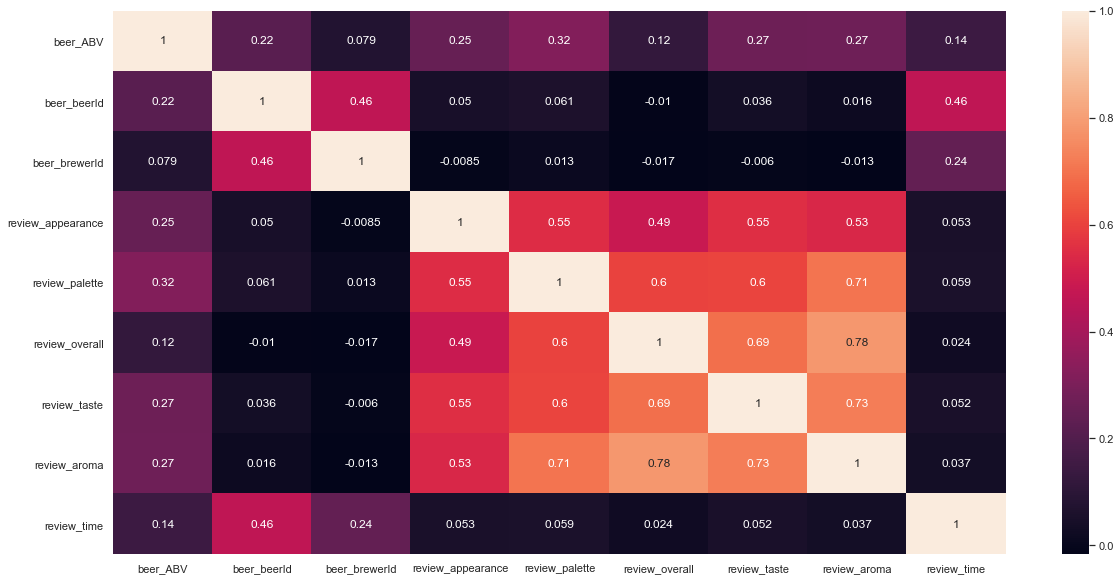

In [46]:

#### Correlation heatmap of the numberic variables
plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(corr, annot=True)
plt.show()

##### The most important factor based on users ratings was analyzed in 2 parallel scenarios:
#####  1.  Developing a machine learning boosting model to calculate the feature importance of all ratings in relationship to the overall review
#####  2.  Based on the correlation of the individual review columns with the overall reviews
##### --Scenario 1: The most important factor is the user review on aroma which had the an importance coefficient of 0.88, , followed closely by the user ratings on taste(.097), review on palette had 0.013  and review on appearance having an importance coefficient of 0.012.
##### --Scenario 2: The most important factor is the user ratings on aroma which had the highest correlation(0.78) with the overall review, followed closely by the user ratings on taste(.69), review on palette and having review on appearance of the beer as the least important factor.

#####  Both Scenarios gave the same result. Review on taste is the most importan factor for beer.

### 4. If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [48]:
from scipy import sparse

In [49]:
beer.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,"A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Quite dark orange in color, with a lively carbonation (now visible, under the foam). Again tending to lactic sourness. Same for the taste. With some yeast and banana.",2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again malt and caramel in the taste, not bad in the end. Maybe a note of honey in teh back, and a light fruitiness. Average body. In the aftertaste a light bitterness, with the malt and red fruit. Nothing exceptional, but not bad, drinkable beer.",2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compact, not bad. Light smell, just a bit of roast, and some hop. A bit too light. The taste is light oo, and drinkable, with some malt, roast, hints of coffee. Nothing exceptional, but after all drinkable and pleasant. Light to average body. In the aftertaste some dust, somr roast, hint of caramel, and a bit of bitterness. No defect, drinkable, not bad.",2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good hop. Quite dry, with a good grassy note. Hay. Fresh and pleasant. More sweet in the mouth, with honey. The hop comes back in the end, and in the aftertaste. Not bad, but a bit too sweet for a pils. In the end some vanilla and camomile note. In the aftertaste, too. Though the hop, a bit too sweet. Honest.",2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Caldera Cauldron changes every year. The current release is a DIPA, which frankly is the only cauldron I'm familiar with (it was an IPA/DIPA the last time I ordered a cauldron at the horsebrass several years back). In any event... at the Horse Brass yesterday. The beer pours an orange copper color with good head retention and lacing. The nose is all hoppy IPA goodness, showcasing a huge aroma of dry citrus, pine and sandlewood. The flavor profile replicates the nose pretty closely in this West Coast all the way DIPA. This DIPA is not for the faint of heart and is a bit much even for a hophead like myslf. The finish is quite dry and hoppy, and there's barely enough sweet malt to balance and hold up the avalanche of hoppy bitterness in this beer. Mouthfeel is actually fairly light, with a long, persistentely bitter finish. Drinkability is good, with the alcohol barely noticeable in this well crafted beer. Still, this beer is so hugely hoppy/bitter, it's really hard for me to imagine ordering more than a single glass. Regardless, this is a very impressive beer from the folks at Caldera.",2010


In [50]:
rec_b =beer.drop(['beer_ABV', 'beer_style', 'beer_brewerId', 'review_appearance', 'review_palette', 'review_text', 'review_taste', 'review_profileName', 'review_aroma', 'review_time'],axis=1)

In [51]:
rec_b.head()

,beer_beerId,beer_name,review_overall
0,47986,Sausa Weizen,1.5
1,48213,Red Moon,3.0
2,48215,Black Horse Black Beer,3.0
3,47969,Sausa Pils,3.0
4,64883,Cauldron DIPA,4.0


In [52]:
userRatings = rec_b.pivot_table(index=['beer_beerId'],columns=['beer_name'],values='review_overall')
userRatings.head()
print("Before: ",userRatings.shape)
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
#userRatings.fillna(0, inplace=True)
print("After: ",userRatings.shape)

Before:  (20200, 18339)
After:  (20200, 40)


In [53]:
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head(100)

beer_name,Amber Ale,Belgian Dubbel,Best Bitter,Brown Ale,Christmas Ale,Cream Ale,...,Summer Ale,Vienna Lager,Weizen,Weizenbock,Winter Ale,Winter Warmer
beer_name,,,,,,,,,,,,,
Amber Ale,1.000000,-0.000690,-0.000686,-0.000680,-0.000685,-0.000792,...,-0.000687,-0.000916,-0.000719,-0.000724,-0.000757,-0.000833
Belgian Dubbel,-0.000690,1.000000,-0.000487,-0.000483,-0.000487,-0.000563,...,-0.000488,-0.000651,-0.000511,-0.000514,-0.000537,-0.000591
Best Bitter,-0.000686,-0.000487,1.000000,-0.000480,-0.000484,-0.000559,...,-0.000485,-0.000647,-0.000507,-0.000511,-0.000534,-0.000587
Brown Ale,-0.000680,-0.000483,-0.000480,1.000000,-0.000480,-0.000555,...,-0.000481,-0.000641,-0.000503,-0.000507,-0.000530,-0.000583
Christmas Ale,-0.000685,-0.000487,-0.000484,-0.000480,1.000000,-0.000559,...,-0.000484,-0.000646,-0.000507,-0.000510,-0.000534,-0.000587
Cream Ale,-0.000792,-0.000563,-0.000559,-0.000555,-0.000559,1.000000,...,-0.000560,-0.000747,-0.000586,-0.000590,-0.000617,-0.000679
Doppelbock,-0.000687,-0.000488,-0.000485,-0.000481,-0.000484,-0.000560,...,-0.000485,-0.000647,-0.000508,-0.000511,-0.000535,-0.000588
Dunkelweizen,-0.000778,-0.000552,-0.000549,-0.000544,-0.000548,-0.000634,...,-0.000549,-0.000733,-0.000575,-0.000579,-0.000605,-0.000666
ESB,-0.001033,-0.000734,-0.000729,-0.000723,-0.000729,-0.000842,...,-0.000730,-0.000974,-0.000765,-0.000769,-0.000804,-0.000885


In [54]:
def get_similar(b_name,rec_b):
    similar_ratings = corrMatrix[b_name]*(rec_b-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

In [55]:

nicest_beer = [("Best Bitter",5),("Winter Ale",5),("Stout",5),("Winter Warmer",4)]
similar_name = pd.DataFrame()
for name,rec_b in nicest_beer:
    similar_name = similar_name.append(get_similar(name,rec_b),ignore_index = True)

similar_name.head(10)

,Amber Ale,Belgian Dubbel,Best Bitter,Brown Ale,Christmas Ale,Cream Ale,...,Summer Ale,Vienna Lager,Weizen,Weizenbock,Winter Ale,Winter Warmer
0,-0.001715,-0.001218,2.500000,-0.001200,-0.001209,-0.001398,...,-0.001212,-0.001616,-0.001269,-0.001277,-0.001335,-0.001469
1,-0.001892,-0.001343,-0.001335,-0.001324,-0.001334,-0.001542,...,-0.001337,-0.001783,-0.001400,-0.001408,2.500000,-0.001620
2,-0.002525,-0.001793,-0.001782,-0.001768,-0.001781,-0.002059,...,-0.001784,-0.002381,-0.001868,-0.001880,-0.001966,-0.002163
3,-0.001249,-0.000887,-0.000881,-0.000874,-0.000881,-0.001018,...,-0.000882,-0.001177,-0.000924,-0.000930,-0.000972,1.500000


In [56]:
similar_name.sum().sort_values(ascending=False).head(20)

Best Bitter               2.496002
Winter Ale                2.495727
Stout                     2.494954
Winter Warmer             1.494748
Brown Ale                -0.005166
Christmas Ale            -0.005205
Doppelbock               -0.005214
Summer Ale               -0.005215
Irish Red Ale            -0.005219
Belgian Dubbel           -0.005241
Saison                   -0.005241
Weizen                   -0.005461
Weizenbock               -0.005495
Kolsch                   -0.005506
Red Ale                  -0.005692
Russian Imperial Stout   -0.005725
Irish Stout              -0.005840
Dunkelweizen             -0.005904
Grand Cru                -0.005958
Cream Ale                -0.006017
dtype: float64

### Brown Ale,Christmas Ale,Doppelbock are my reccomended beer